<a href="https://colab.research.google.com/github/jaredguting/colab-projects/blob/main/Lyric_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Step 1 & 2

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as CMD
drive.mount('/content/drive')
dir_name = '/content/drive/MyDrive/Colab Notebooks/Datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(f"{dir_name}randomsongs_undersampled.csv", encoding='latin1')
df

,Unnamed: 0,lyric_text,artist
0,0,Kwento ko sayo ngayon,rivermaya
1,1,dinggin mo please payong ito Inom tubig nood n...,rivermaya
2,2,Ang bayanihang minana mo,rivermaya
3,3,Kampanang yayanig,rivermaya
4,4,Harapin ang harapin ang katotohanan Ang sarap ...,rivermaya
...,...,...,...
575,575,I find it hard to believe that all the pain th...,eraserheads
576,576,You could sleep a hundred years I will wake yo...,eraserheads
577,577,May mga kumakalat na balita na ang kaligtasay ...,eraserheads
578,578,Dont blink cuz youll be taken out by the pen a...,eraserheads


####Step 3

In [ ]:
df2 = pd.DataFrame(df)
df_count = df['artist'].value_counts()
df_count

rivermaya      290
eraserheads    290
Name: artist, dtype: int64

####Step 4

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  580 non-null    int64 
 1   lyric_text  580 non-null    object
 2   artist      580 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.7+ KB


####Step 5 & 6

In [ ]:
def clean_text(text):
    cleaned_text = ""
    for c in text:
        if c.isalnum() or c.isspace():
            cleaned_text += c.lower()
    return cleaned_text

df2['cleaned_text'] = df2['lyric_text'].apply(clean_text)
df2[['cleaned_text']]

,cleaned_text
0,kwento ko sayo ngayon
1,dinggin mo please payong ito inom tubig nood n...
2,ang bayanihang minana mo
3,kampanang yayanig
4,harapin ang harapin ang katotohanan ang sarap ...
...,...
575,i find it hard to believe that all the pain th...
576,you could sleep a hundred years i will wake yo...
577,may mga kumakalat na balita na ang kaligtasay ...
578,dont blink cuz youll be taken out by the pen a...


##Training size = 75%; Random_state = 1989

####Step 8

In [ ]:
lyricsCol = df2["cleaned_text"].values
artistCol = df["artist"].values

x_train, x_test, y_train, y_test = train_test_split(lyricsCol, artistCol, train_size = 0.75, random_state = 1989)

####Step 7

In [ ]:
vectorizer = CountVectorizer()

x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

####Step 9

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_vec, y_train)

LogisticRegression()

####Step 10

In [ ]:
y_pred = clf.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8206896551724138


In [ ]:
report = classification_report(y_test, y_pred, target_names=df['artist'].unique())
print(report)

              precision    recall  f1-score   support

   rivermaya       0.82      0.75      0.78        63
 eraserheads       0.82      0.88      0.85        82

    accuracy                           0.82       145
   macro avg       0.82      0.81      0.82       145
weighted avg       0.82      0.82      0.82       145



####Step 11

[[47 16]
 [10 72]]


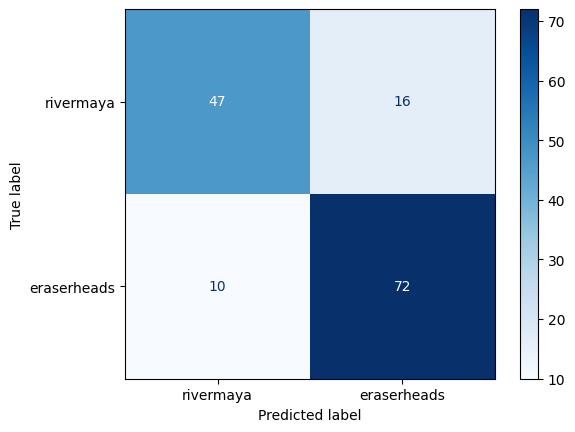

In [ ]:
disp = CMD.from_estimator(
    clf,
    x_test_vec,
    y_test,
    display_labels=df['artist'].unique(),
    cmap=plt.cm.Blues,
    normalize=None)
print(disp.confusion_matrix)
plt.show()

##Training size = 80%; Random_state = 1989

####Step 8

In [ ]:
lyricsCol = df2["cleaned_text"].values
artistCol = df["artist"].values

x_train, x_test, y_train, y_test = train_test_split(lyricsCol, artistCol, train_size = 0.80, random_state = 1989)

####Step 7

In [ ]:
vectorizer = CountVectorizer()

x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

####Step 9

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_vec, y_train)

LogisticRegression()

####Step 10

In [ ]:
y_pred = clf.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8189655172413793


In [ ]:
report = classification_report(y_test, y_pred, target_names=df['artist'].unique())
print(report)

              precision    recall  f1-score   support

   rivermaya       0.85      0.74      0.79        54
 eraserheads       0.80      0.89      0.84        62

    accuracy                           0.82       116
   macro avg       0.82      0.81      0.82       116
weighted avg       0.82      0.82      0.82       116



####Step 11

[[40 14]
 [ 7 55]]


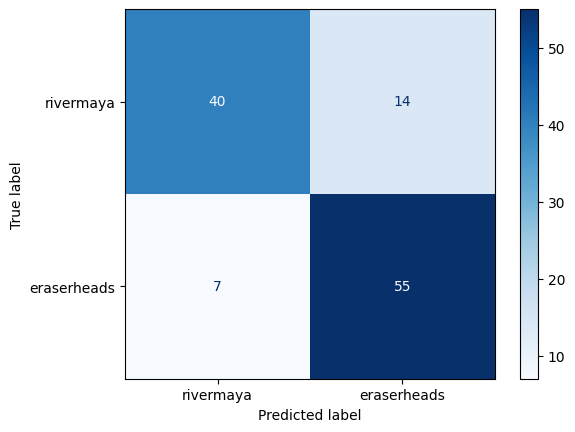

In [ ]:
disp = CMD.from_estimator(
    clf,
    x_test_vec,
    y_test,
    display_labels=df['artist'].unique(),
    cmap=plt.cm.Blues,
    normalize=None)
print(disp.confusion_matrix)
plt.show()

##Training size = 90%; Random_state = 1989

####Step 8

In [ ]:
lyricsCol = df2["cleaned_text"].values
artistCol = df["artist"].values

x_train, x_test, y_train, y_test = train_test_split(lyricsCol, artistCol, train_size = 0.90, random_state = 1989)

####Step 7

In [ ]:
vectorizer = CountVectorizer()

x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

####Step 9

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_vec, y_train)

LogisticRegression()

####Step 10

In [ ]:
y_pred = clf.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8448275862068966


In [ ]:
report = classification_report(y_test, y_pred, target_names=df['artist'].unique())
print(report)

              precision    recall  f1-score   support

   rivermaya       0.90      0.72      0.80        25
 eraserheads       0.82      0.94      0.87        33

    accuracy                           0.84        58
   macro avg       0.86      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



####Step 11

[[18  7]
 [ 2 31]]


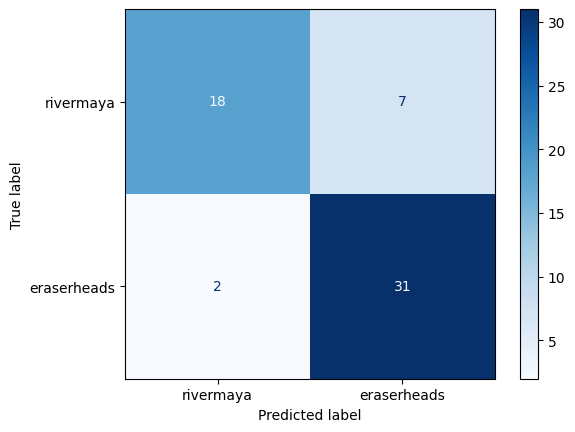

In [ ]:
disp = CMD.from_estimator(
    clf,
    x_test_vec,
    y_test,
    display_labels=df['artist'].unique(),
    cmap=plt.cm.Blues,
    normalize=None)
print(disp.confusion_matrix)
plt.show()